# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('SINASC_RO_2019-Copy1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [20]:
asfixia = df[['APGAR5']]
df.loc[df['APGAR5'] >= 8, 'ASFIXIA'] = 'Asfixia Normal'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'ASFIXIA'] = 'Asfixia Leve'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'ASFIXIA'] = 'Asfixia Moderada'
df.loc[df['APGAR5'] <= 3, 'ASFIXIA'] = 'Asfixia Severa'

asfixia.value_counts()

APGAR5
9.0       16076
10.0       8393
8.0        1994
7.0         241
6.0          79
5.0          45
1.0          24
4.0          23
2.0          18
0.0          17
3.0          15
dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

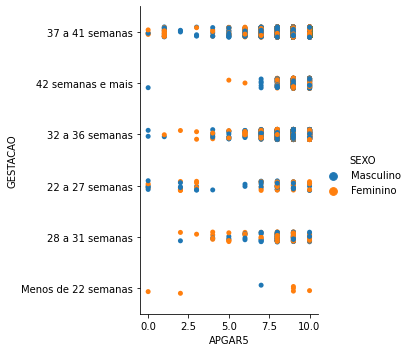

In [21]:
sns.catplot(x='APGAR5', y='GESTACAO', hue='SEXO', data=df)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [22]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [27]:
pct_frequencia = freq.div(freq.sum(axis=1), axis=0)
pct_frequencia

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

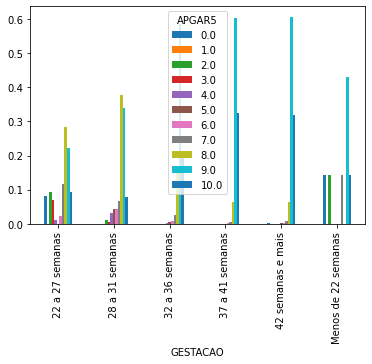

In [28]:
pct_frequencia.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

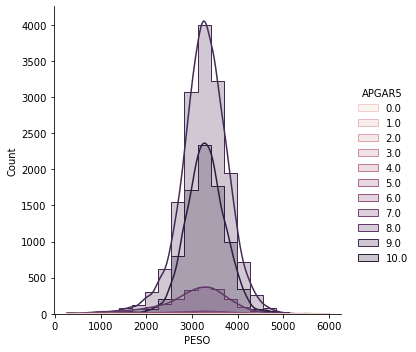

In [40]:
sns.displot(data = df
            ,alpha = .25
            ,x = 'PESO'
            ,hue = 'APGAR5'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

In [43]:
df.loc[(df['PESO'] <= 1000), 'cat_peso'] = '1 - menor 1000g'
df.loc[(df['PESO'] > 1000 )& (df['APGAR5'] <= 2000), 'cat_peso'] = '2 - 1000g a 2000g'
df.loc[(df['PESO'] > 2000 )& (df['APGAR5'] <= 3000), 'cat_peso'] = '3 - 2000g a 3000g'
df.loc[(df['PESO'] > 3000 )& (df['APGAR5'] <= 4000), 'cat_peso'] = '4 - 3000g a 4000g'
df.loc[(df['PESO'] > 4000 )& (df['APGAR5'] <= 5000), 'cat_peso'] = '5 - 4000g a 5000g'
df.loc[(df['PESO'] > 5000), 'cat_peso'] = '6 - mais 5000g'

df['cat_peso'].value_counts()

4 - 3000g a 4000g    17950
3 - 2000g a 3000g     6748
5 - 4000g a 5000g     1534
2 - 1000g a 2000g      549
1 - menor 1000g        133
6 - mais 5000g          12
Name: cat_peso, dtype: int64

In [47]:
tab_peso = pd.crosstab(df['cat_peso'], df['APGAR5'])

In [48]:
tab_pct = tab_peso.div(tab_peso.sum(axis = 1), axis = 0 )

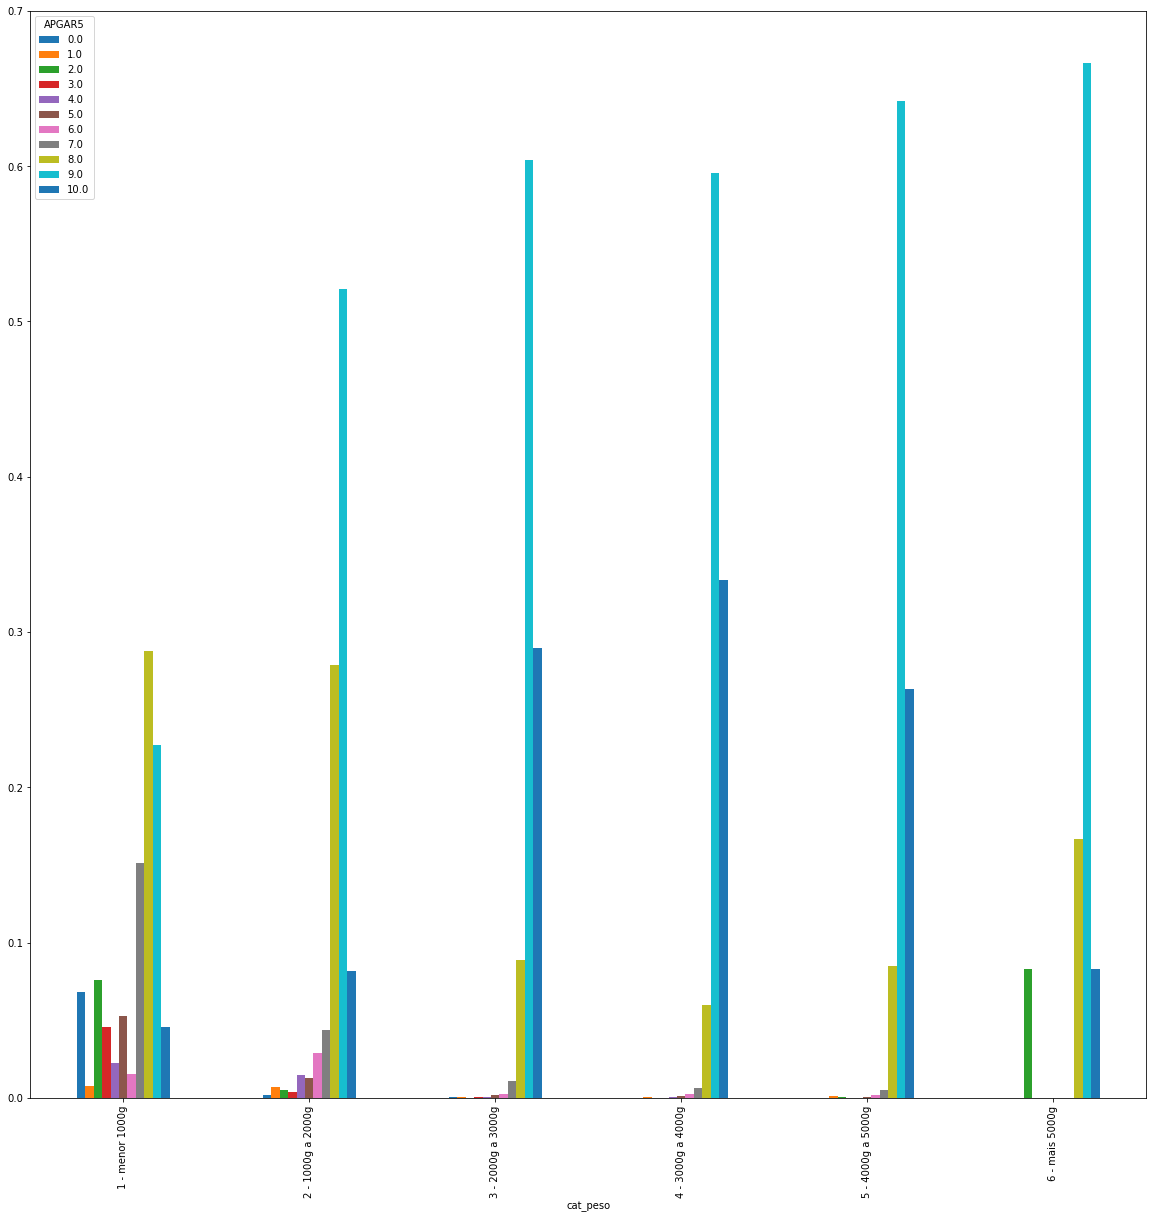

In [59]:
tab_pct.plot.bar()
plt.rc('figure', figsize=(20,15))
